## Pytorch Workflow

1. Get data and convert it into tensor
2. Building a model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model(interface)
5. Saving and loading a model
6. Putting it all together

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt


#check pytorch version
torch.__version__

'2.2.1+cu121'

## 1. Data Preparing
Data can be almost anything.. in machine learning

* Excel Spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation
2. Build a model

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with know parameters.

In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

#create
start =0
end = 1
step = 0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Slitting data into training and test sets ( one of the most import concepts in machine learning in general)

Let's create a training and test dataset

In [4]:
# create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test)

(40, 10)

How might we better visualize our data?

This is wheere the data emplorer's motto comes in !

"Visualize, visualize, visualize"

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training Data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing Data')

  # Are there predictions?
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data,predictions, c='r', s=4,label='Predictions')
  plt.legend(prop={"size":12})

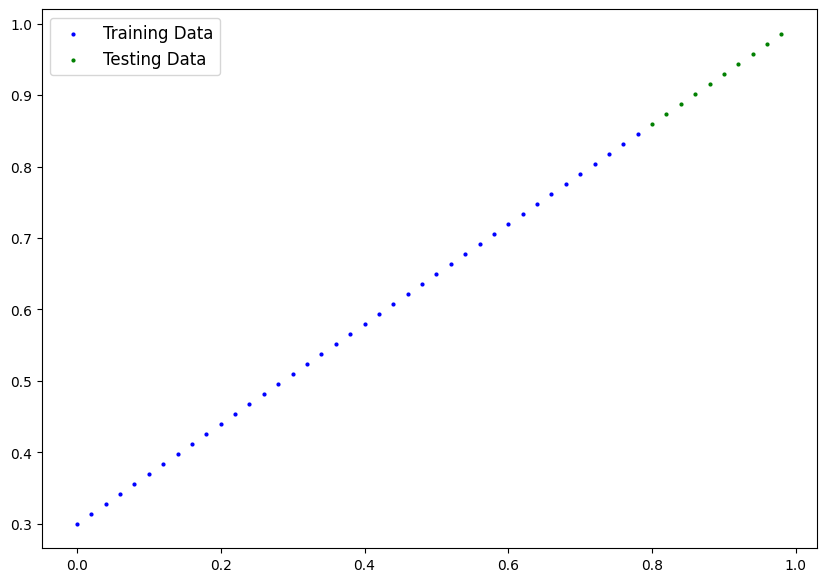

In [6]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values ( the weight & bias values we used to create the data)

How does it do so?

Through two main algoriths:
1. Gradient descent https://www.youtube.com/watch?v=sDv4f4s2SB8&t=494s
2. Backpropagation

In [7]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor)->torch.Tensor: #<- 'x' is the input data'
      return self.weights*x+ self.bias # this is the linear regression


### PyTorch model building essentials

* torch.nn -- contains all of the buildings block for computational graphs (a neural network can be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, in you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contenst of our PyTorch model

Now we've created a model, let's see what's inside ...

So we can check our model parameters or what's inside our model using .parameters().

In [8]:
# create a random seed
seed = 42
torch.manual_seed(seed)

#create a instance of the model ( this is a subclass of nn.module)
model_0= LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

### making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts  `y test` based on `x_test`
When we pass through our model, it's going to run it through the forward() method

In [11]:
# as we grad_fn=<AddBackward0 so we need to use inference mode
ypreds = model_0(X_test)
ypreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# make predictions with model
# you can also do something similar with torch.nograd but inference_mode() is prefered
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

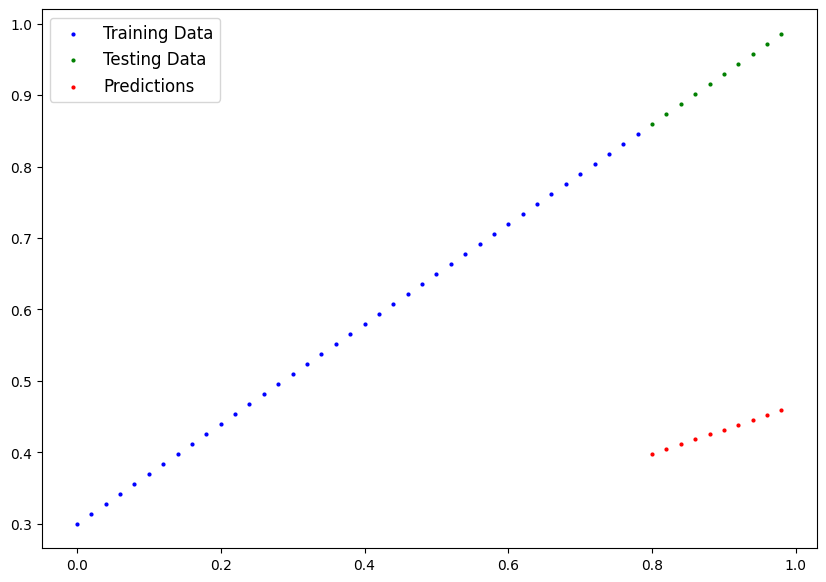

In [13]:
plot_predictions(predictions=y_preds);

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters

on in other words from poor representation of the data to better representation

One way to measure how poor or how wrong your models are is to use the loss functions

* Note: Loss function may also be called cost function or criterion areas

Things we need to train:

* **Loss function** A function to measure how wrong your model's predictions are
* **Optimizer** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing Loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
#pick a loss function we used L1loss which is basically mean absolute error
loss_fn= nn.L1Loss()

# pick a optimizer we are using SGD which is stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)# learning rate usually it is 0.01,0.001,0.0001 adjusting this is called learning rate scheduling

### Building a training loop ( and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass ( this involves data moving through our model's `forward()` functions - also called forward propagation
2. Calculate the loss (compare forward pass predictions truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with the respect to the loss (**back propogation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
torch.manual_seed(42)

# An epoch is one loop through the data.. (this is )

# hyper parameter set by the ML engineer
epochs = 200

#tracking differet values
epoch_count=[]
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # 1. set the model in training model
  model_0.train()

  #2. forward step
  y_pred = model_0(X_train)

  # 3. calculate the loss function
  loss = loss_fn(y_pred,y_train)

  # 4. zero grad the optimizer
  optimizer.zero_grad()

  # 5. backward propogation
  loss.backward()

  # 6. optimizer step
  optimizer.step()

  # testing mode
  model_0.eval()

  with torch.inference_mode():
    # forward mode
    test_pred = model_0(X_test)

    # 2. calculate loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch%10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}')
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

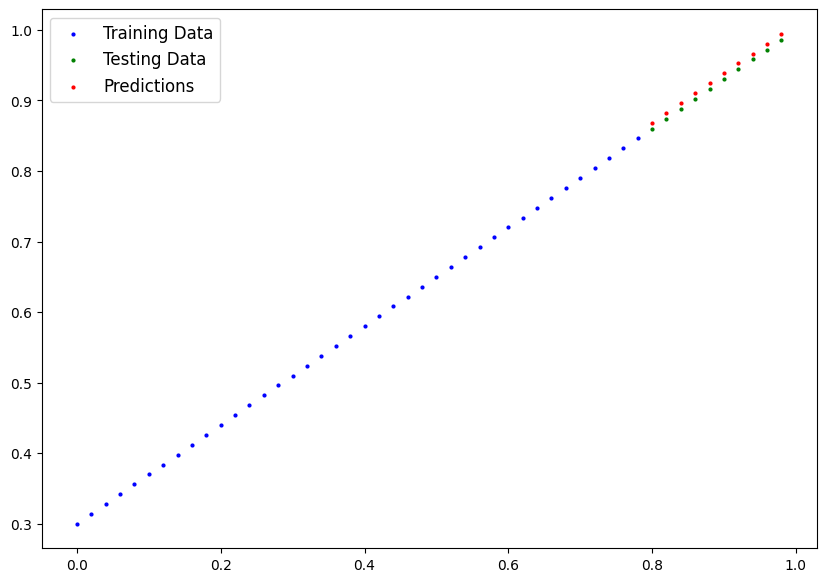

In [19]:
plot_predictions(predictions=test_pred);

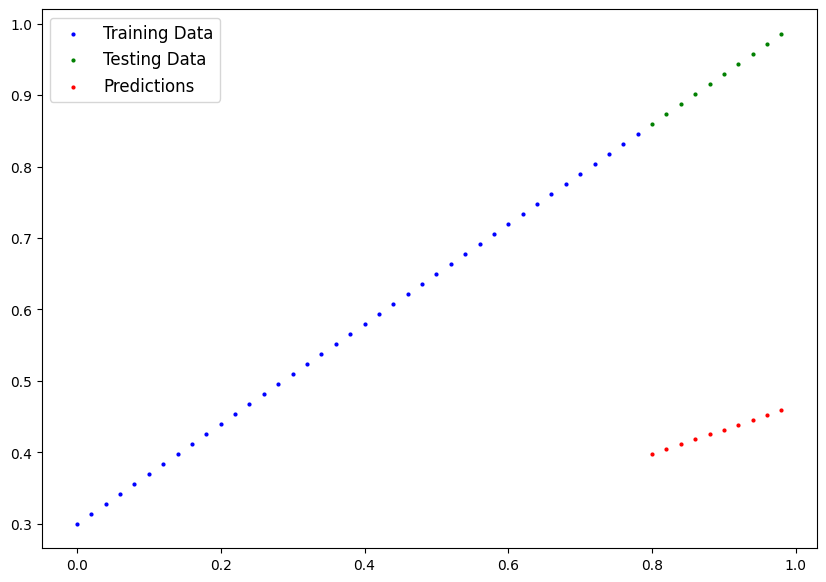

In [20]:
plot_predictions(predictions=y_preds)

Text(0.5, 0, 'Epochs')

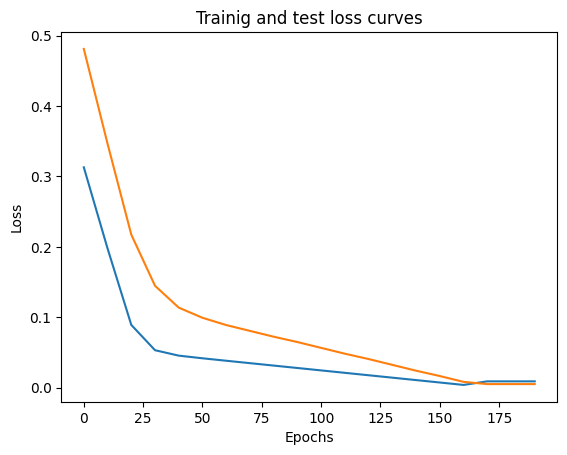

In [21]:
plt.plot(epoch_count,loss_values,label='Train Loss')
plt.plot(epoch_count,test_loss_values,label = 'Test Loss')
plt.title('Trainig and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

## saving a model in PyTorch
There are three main methods you should know about for saving and loading models in Pytorch.and

1. `Torch.save()` - allows you save a PyTorch load object in Python's pickle format
2. `Torch.load()` - allows you load a saved PyTorch Object
3. `torch.nn.Module.load_state_dict()` - this allows you to load model's save state dictionary

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
#saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_fundamentals.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f'Saving the model to: {MODEL_SAVE_PATH}')

torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_fundamentals.pth


In [24]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1710 Mar 23 11:14 01_pytorch_workflow_fundamentals.pth


## Loading a PyTorch model

In [25]:
# to save the model we need to instantiate a new instance of our model class
test_model_load = LinearRegressionModel()

#load the saved state_dict of model_0
test_model_load.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
test_model_load.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
test_model_load.eval()
with torch.inference_mode():
  loaded_pred = test_model_load(X_test)

In [28]:
model_0.eval()
with torch.inference_mode():
  test_pred=model_0(X_test)

In [29]:
model_0.state_dict(),test_model_load.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [30]:
loaded_pred == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])